In [2]:
import cv2
import numpy as np
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from plantcv.learn import train_kmeans

In [25]:
# Set input variables
args = WorkflowInputs(images=[r"R:\01-Organize\01-Management\01-Data Center\Brisk\06-AI & Machine Learning (D0340)\04-IOT_Smartfarm\picture_original_sideview_smartfarm\picture_sideview_03092025_140953.jpg"],
                      names="image",
                      result="plantcv_results.csv",
                      debug="plot")

# Set variables
pcv.params.debug = args.debug
pcv.params.dpi = 100
pcv.params.text_size = 0.5
pcv.params.text_thickness = 2

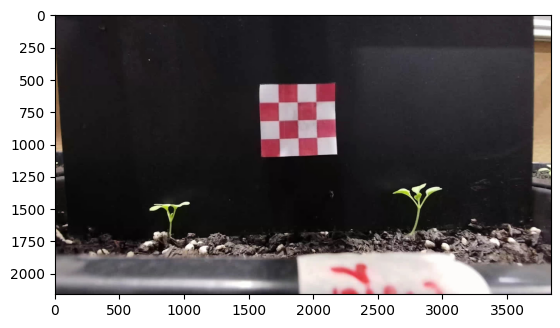

In [26]:
img, imgpath, imgname = pcv.readimage(filename=args.image)

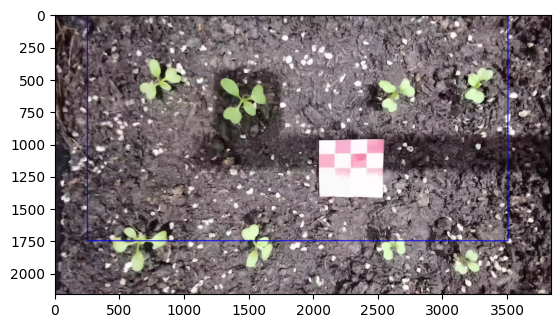

In [18]:
crop_img = pcv.crop(img=img, x=250, y=0, h=1750, w=3250)

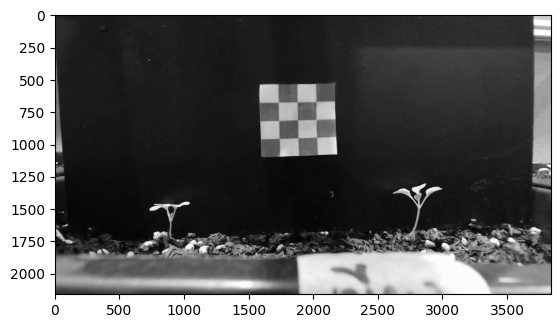

In [31]:
gray_img = pcv.rgb2gray(rgb_img=img)

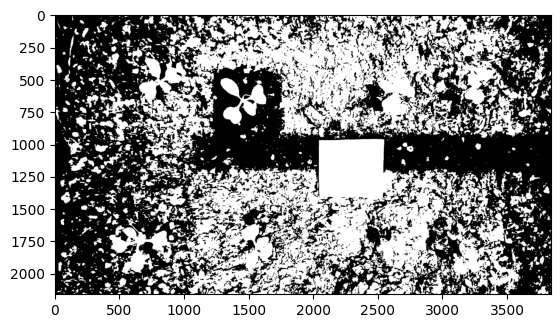

In [20]:
th = pcv.threshold.otsu(gray_img=gray_img, object_type='light')  

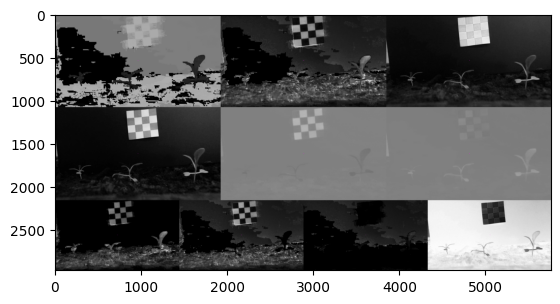

In [26]:
colorspaces = pcv.visualize.colorspaces(rgb_img=img, original_img=False)

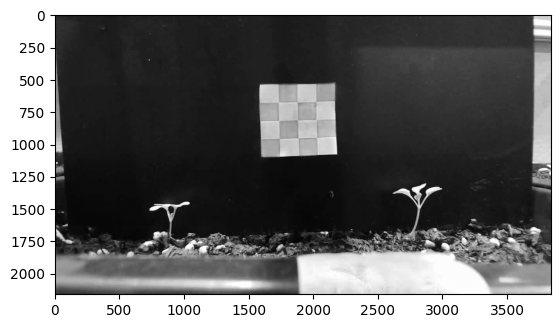

In [33]:
a = pcv.rgb2gray_hsv(rgb_img=img, channel='v')

In [60]:
hist_a = pcv.visualize.histogram(img=a, bins=25)

alt.Chart(...)

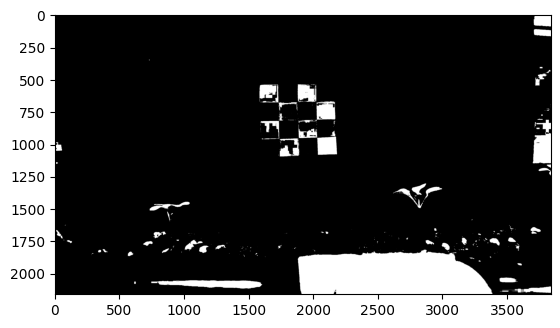

In [34]:
thresh = pcv.threshold.binary(gray_img=a, threshold=200, object_type='light')

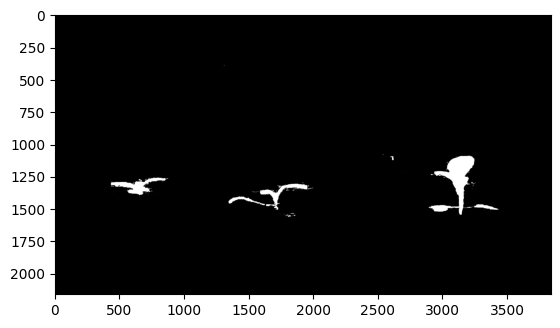

In [112]:
fill_image = pcv.fill_holes(bin_img=thresh)


In [78]:
# Points previously defined  
pts = [(159, 128), (132, 110)]
# Create binary image from a RGB image based on two color channels and a straight
# line defined by two points
mask = pcv.threshold.threshold_2_channels(rgb_img=img, x_channel='b', y_channel='a', points=pts, above=False)

AttributeError: module 'plantcv.plantcv.threshold' has no attribute 'threshold_2_channels'

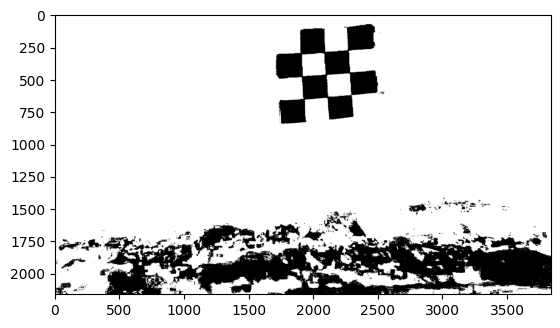

In [74]:
thresh_otsu = pcv.threshold.otsu(gray_img=a,
                                 object_type='dark')

In [7]:
threshold_mean = pcv.threshold.mean(gray_img=a, ksize=999, offset=3,
                                    object_type='dark')

NameError: name 'a' is not defined

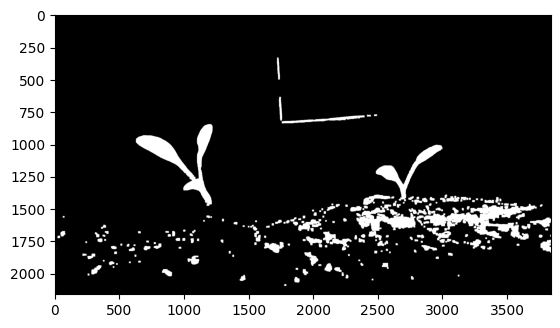

In [67]:
dilate_img = pcv.dilate(gray_img=thresh, ksize=5, i=3)

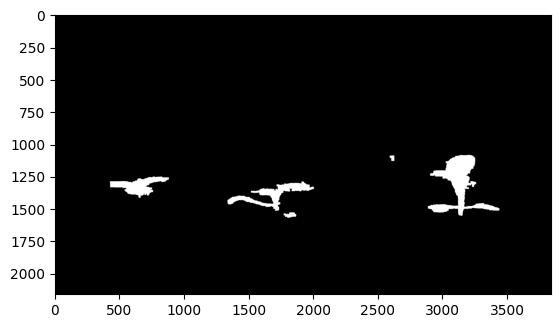

In [114]:
a_fill = pcv.fill(bin_img=dilate_img, size=1000)

In [92]:
filtered_img = pcv.closing(gray_img=a_fill, kernel=np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]]))

NameError: name 'a_fill' is not defined

There were 2236 objects not annotated.


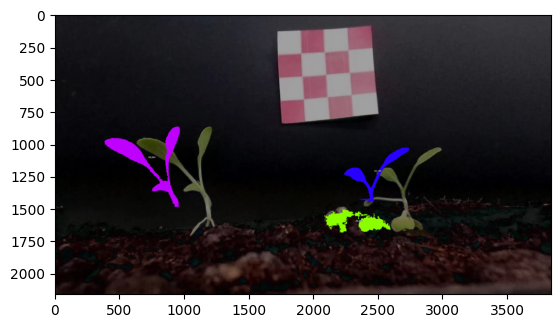

In [93]:
plotting_img = pcv.visualize.obj_sizes(img=img, mask=threshold_mean, num_objects=3)

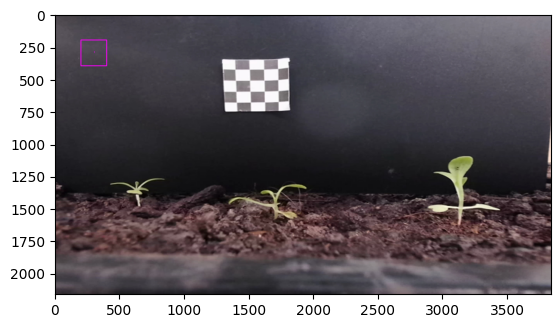

In [61]:
roi = pcv.roi.rectangle(img=img, x=200, y=200, h=200, w=200)